In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

# Load the saved CSV file
data1 = pd.read_csv('./Data/uniform.csv')
data2 = pd.read_csv('./Data/constant.csv')

data = pd.concat([data1, data2], axis=0, ignore_index=True)


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch
from torch.utils.data import Dataset, DataLoader

device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

# Define target and input variables
target_cols = [
    'medianMLength90', 
    'meanNumPixels90',
    'meanLineIntensity'
]

input_cols = [
    'Z', 'Wall', 'Overhang', 'NoLines', 'Power',
    'd_edge_right', 'd_edge_left', 'd_over_left',
    'd_over_right', 'd_col', 'd_over_z',
    'prev_Wall', 'prev_Overhang', 'prev_NoLines', 'prev_Power',
    'prev_d_edge_right', 'prev_d_edge_left', 'prev_d_over_left',
    'prev_d_over_right', 'prev_d_col', 'prev_d_over_z',

]

# Extract features and targets
X = data[input_cols].values
y = data[target_cols].values

# Create a custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Function to prepare data loaders for a specific fold
def prepare_fold_data(X, y, train_idx, val_idx, batch_size=32):
    # Always use StandardScaler for features
    scaler = StandardScaler()
    scaler_y = StandardScaler()  
    
    # Scale features
    X_train = scaler.fit_transform(X[train_idx])
    X_val = scaler.transform(X[val_idx])
    
    # Scale targets
    y_train = scaler_y.fit_transform(y[train_idx])
    y_val = scaler_y.transform(y[val_idx])
    
    # Create datasets
    train_dataset = CustomDataset(X_train, y_train)
    val_dataset = CustomDataset(X_val, y_val)
    
    # Create data loaders with larger batch size
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False
    )
    
    return train_loader, val_loader, scaler, scaler_y

# Set up K-Fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Store fold indices for later use
fold_indices = []
for train_idx, val_idx in kf.split(X):
    fold_indices.append((train_idx, val_idx))



Training Fold 1
--------------------------------------------------
Total Parameters: 1,588,739
Epoch [10/10000], Train Loss: 0.864964, Val Loss: 0.864891
Epoch [20/10000], Train Loss: 0.719000, Val Loss: 0.734458
Epoch [30/10000], Train Loss: 0.621370, Val Loss: 0.651671
Epoch [40/10000], Train Loss: 0.593040, Val Loss: 0.629918
Epoch [50/10000], Train Loss: 0.577003, Val Loss: 0.618975
Epoch [60/10000], Train Loss: 0.570254, Val Loss: 0.610709
Epoch [70/10000], Train Loss: 0.563128, Val Loss: 0.605746
Epoch [80/10000], Train Loss: 0.552465, Val Loss: 0.602876
Epoch [90/10000], Train Loss: 0.551696, Val Loss: 0.597077
Epoch [100/10000], Train Loss: 0.543952, Val Loss: 0.593995
Epoch [110/10000], Train Loss: 0.538205, Val Loss: 0.589737
Epoch [120/10000], Train Loss: 0.534994, Val Loss: 0.588652
Epoch [130/10000], Train Loss: 0.531193, Val Loss: 0.583978
Epoch [140/10000], Train Loss: 0.530227, Val Loss: 0.581035
Epoch [150/10000], Train Loss: 0.529556, Val Loss: 0.580981
Epoch [160/10

Epoch [1360/10000], Train Loss: 0.381972, Val Loss: 0.485656
Epoch [1370/10000], Train Loss: 0.372474, Val Loss: 0.487017
Epoch [1380/10000], Train Loss: 0.376911, Val Loss: 0.485866
Epoch [1390/10000], Train Loss: 0.378971, Val Loss: 0.486691
Epoch [1400/10000], Train Loss: 0.373183, Val Loss: 0.485794
Epoch [1410/10000], Train Loss: 0.370798, Val Loss: 0.485277
Epoch [1420/10000], Train Loss: 0.372090, Val Loss: 0.483211
Epoch [1430/10000], Train Loss: 0.368439, Val Loss: 0.483136
Epoch [1440/10000], Train Loss: 0.370989, Val Loss: 0.485190
Epoch [1450/10000], Train Loss: 0.367650, Val Loss: 0.482787
Epoch [1460/10000], Train Loss: 0.368609, Val Loss: 0.484488
Epoch [1470/10000], Train Loss: 0.367214, Val Loss: 0.483008
Epoch [1480/10000], Train Loss: 0.370092, Val Loss: 0.482394
Epoch [1490/10000], Train Loss: 0.359730, Val Loss: 0.481857
Epoch [1500/10000], Train Loss: 0.367978, Val Loss: 0.483056
Epoch [1510/10000], Train Loss: 0.361066, Val Loss: 0.484074
Epoch [1520/10000], Trai

Epoch [2710/10000], Train Loss: 0.295031, Val Loss: 0.472325
Epoch [2720/10000], Train Loss: 0.300166, Val Loss: 0.471634
Epoch [2730/10000], Train Loss: 0.295216, Val Loss: 0.470228
Epoch [2740/10000], Train Loss: 0.288862, Val Loss: 0.471334
Epoch [2750/10000], Train Loss: 0.295144, Val Loss: 0.469110
Epoch [2760/10000], Train Loss: 0.293438, Val Loss: 0.472294
Epoch [2770/10000], Train Loss: 0.291117, Val Loss: 0.468644
Epoch [2780/10000], Train Loss: 0.294025, Val Loss: 0.473118
Epoch [2790/10000], Train Loss: 0.293205, Val Loss: 0.470099
Epoch [2800/10000], Train Loss: 0.292012, Val Loss: 0.470164
Epoch [2810/10000], Train Loss: 0.286266, Val Loss: 0.470749
Epoch [2820/10000], Train Loss: 0.290619, Val Loss: 0.469190
Epoch [2830/10000], Train Loss: 0.290058, Val Loss: 0.468440
Epoch [2840/10000], Train Loss: 0.292625, Val Loss: 0.468084
Epoch [2850/10000], Train Loss: 0.288869, Val Loss: 0.468675
Epoch [2860/10000], Train Loss: 0.292226, Val Loss: 0.469896
Epoch [2870/10000], Trai

Epoch [4060/10000], Train Loss: 0.242423, Val Loss: 0.452731
Epoch [4070/10000], Train Loss: 0.238678, Val Loss: 0.453722
Epoch [4080/10000], Train Loss: 0.235763, Val Loss: 0.453014
Epoch [4090/10000], Train Loss: 0.238566, Val Loss: 0.453805
Epoch [4100/10000], Train Loss: 0.234741, Val Loss: 0.453940
Epoch [4110/10000], Train Loss: 0.235664, Val Loss: 0.452963
Epoch [4120/10000], Train Loss: 0.235491, Val Loss: 0.450218
Epoch [4130/10000], Train Loss: 0.235486, Val Loss: 0.448113
Epoch [4140/10000], Train Loss: 0.239736, Val Loss: 0.450727
Epoch [4150/10000], Train Loss: 0.232336, Val Loss: 0.452370
Epoch [4160/10000], Train Loss: 0.236009, Val Loss: 0.449906
Epoch [4170/10000], Train Loss: 0.232937, Val Loss: 0.452320
Epoch [4180/10000], Train Loss: 0.231105, Val Loss: 0.449260
Epoch [4190/10000], Train Loss: 0.230751, Val Loss: 0.452206
Epoch [4200/10000], Train Loss: 0.229632, Val Loss: 0.451462
Epoch [4210/10000], Train Loss: 0.232944, Val Loss: 0.448861
Epoch [4220/10000], Trai

Epoch [5410/10000], Train Loss: 0.194037, Val Loss: 0.433051
Epoch [5420/10000], Train Loss: 0.192231, Val Loss: 0.431165
Epoch [5430/10000], Train Loss: 0.193147, Val Loss: 0.435525
Epoch [5440/10000], Train Loss: 0.191558, Val Loss: 0.431965
Epoch [5450/10000], Train Loss: 0.187658, Val Loss: 0.432581
Epoch [5460/10000], Train Loss: 0.187888, Val Loss: 0.431003
Epoch [5470/10000], Train Loss: 0.190965, Val Loss: 0.434542
Epoch [5480/10000], Train Loss: 0.189767, Val Loss: 0.434459
Epoch [5490/10000], Train Loss: 0.192300, Val Loss: 0.429583
Epoch [5500/10000], Train Loss: 0.186507, Val Loss: 0.429570
Epoch [5510/10000], Train Loss: 0.188175, Val Loss: 0.431007
Epoch [5520/10000], Train Loss: 0.191657, Val Loss: 0.432595
Epoch [5530/10000], Train Loss: 0.185545, Val Loss: 0.433346
Epoch [5540/10000], Train Loss: 0.187846, Val Loss: 0.431635
Epoch [5550/10000], Train Loss: 0.190746, Val Loss: 0.430642
Epoch [5560/10000], Train Loss: 0.184649, Val Loss: 0.432677
Epoch [5570/10000], Trai

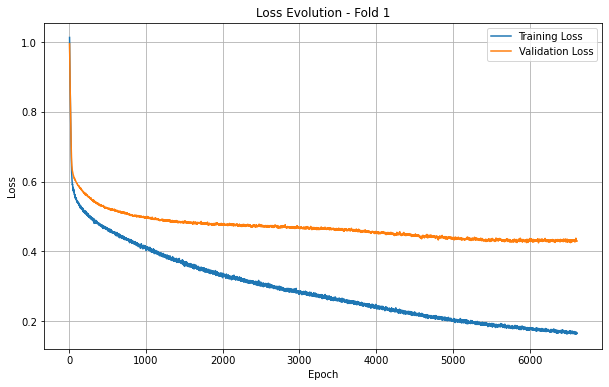

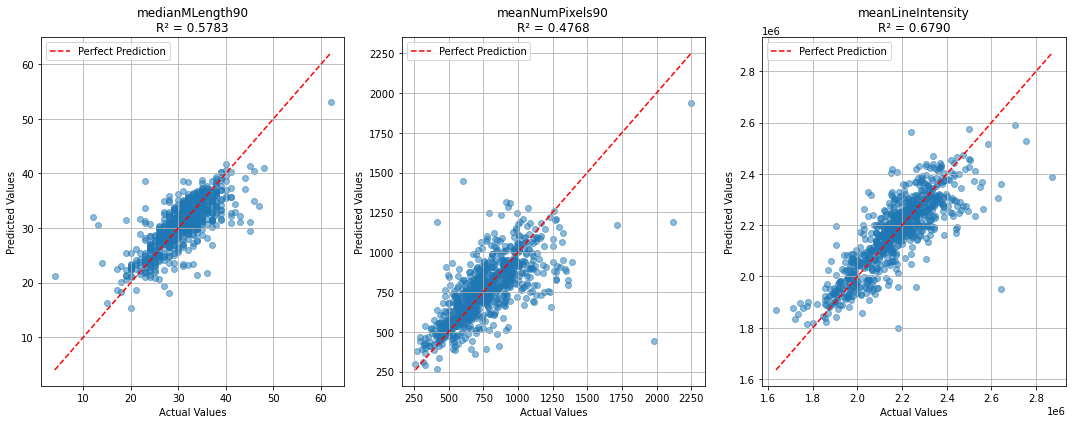


Evaluation Metrics:
MSE: 2723669597.8450
R² (medianMLength90): 0.5783
R² (meanNumPixels90): 0.4768
R² (meanLineIntensity): 0.6790
Fold 1 Validation MSE: 2723669597.8450
Fold 1 R² scores:
    medianMLength90: 0.5783
    meanNumPixels90: 0.4768
    meanLineIntensity: 0.6790

Training Fold 2
--------------------------------------------------
Total Parameters: 1,588,739
Epoch [10/10000], Train Loss: 0.828662, Val Loss: 0.902248
Epoch [20/10000], Train Loss: 0.699674, Val Loss: 0.741007
Epoch [30/10000], Train Loss: 0.629307, Val Loss: 0.652373
Epoch [40/10000], Train Loss: 0.610182, Val Loss: 0.632010
Epoch [50/10000], Train Loss: 0.598562, Val Loss: 0.618517
Epoch [60/10000], Train Loss: 0.586454, Val Loss: 0.612740
Epoch [70/10000], Train Loss: 0.577904, Val Loss: 0.603483
Epoch [80/10000], Train Loss: 0.573244, Val Loss: 0.601080
Epoch [90/10000], Train Loss: 0.566756, Val Loss: 0.593583
Epoch [100/10000], Train Loss: 0.564671, Val Loss: 0.589764
Epoch [110/10000], Train Loss: 0.556375

Epoch [1320/10000], Train Loss: 0.387434, Val Loss: 0.484783
Epoch [1330/10000], Train Loss: 0.387422, Val Loss: 0.485979
Epoch [1340/10000], Train Loss: 0.386297, Val Loss: 0.486197
Epoch [1350/10000], Train Loss: 0.382683, Val Loss: 0.485268
Epoch [1360/10000], Train Loss: 0.380280, Val Loss: 0.487925
Epoch [1370/10000], Train Loss: 0.380871, Val Loss: 0.488078
Epoch [1380/10000], Train Loss: 0.384030, Val Loss: 0.483680
Epoch [1390/10000], Train Loss: 0.382516, Val Loss: 0.480249
Epoch [1400/10000], Train Loss: 0.377325, Val Loss: 0.481650
Epoch [1410/10000], Train Loss: 0.378381, Val Loss: 0.481594
Epoch [1420/10000], Train Loss: 0.380715, Val Loss: 0.483510
Epoch [1430/10000], Train Loss: 0.376145, Val Loss: 0.480528
Epoch [1440/10000], Train Loss: 0.374179, Val Loss: 0.480233
Epoch [1450/10000], Train Loss: 0.372479, Val Loss: 0.482383
Epoch [1460/10000], Train Loss: 0.373668, Val Loss: 0.481491
Epoch [1470/10000], Train Loss: 0.374486, Val Loss: 0.479862
Epoch [1480/10000], Trai

Epoch [2670/10000], Train Loss: 0.296248, Val Loss: 0.445391
Epoch [2680/10000], Train Loss: 0.289062, Val Loss: 0.442484
Epoch [2690/10000], Train Loss: 0.290646, Val Loss: 0.444649
Epoch [2700/10000], Train Loss: 0.290050, Val Loss: 0.448297
Epoch [2710/10000], Train Loss: 0.291883, Val Loss: 0.444619
Epoch [2720/10000], Train Loss: 0.288640, Val Loss: 0.446628
Epoch [2730/10000], Train Loss: 0.294183, Val Loss: 0.443722
Epoch [2740/10000], Train Loss: 0.291892, Val Loss: 0.442812
Epoch [2750/10000], Train Loss: 0.291753, Val Loss: 0.447246
Epoch [2760/10000], Train Loss: 0.292196, Val Loss: 0.443475
Epoch [2770/10000], Train Loss: 0.288423, Val Loss: 0.446187
Epoch [2780/10000], Train Loss: 0.294223, Val Loss: 0.442225
Epoch [2790/10000], Train Loss: 0.293077, Val Loss: 0.443666
Epoch [2800/10000], Train Loss: 0.292077, Val Loss: 0.441971
Epoch [2810/10000], Train Loss: 0.284902, Val Loss: 0.446694
Epoch [2820/10000], Train Loss: 0.289794, Val Loss: 0.441605
Epoch [2830/10000], Trai

Epoch [4020/10000], Train Loss: 0.231288, Val Loss: 0.421909
Epoch [4030/10000], Train Loss: 0.227679, Val Loss: 0.422466
Epoch [4040/10000], Train Loss: 0.227335, Val Loss: 0.426266
Epoch [4050/10000], Train Loss: 0.229662, Val Loss: 0.421517
Epoch [4060/10000], Train Loss: 0.226022, Val Loss: 0.424469
Epoch [4070/10000], Train Loss: 0.227772, Val Loss: 0.423355
Epoch [4080/10000], Train Loss: 0.228021, Val Loss: 0.423738
Epoch [4090/10000], Train Loss: 0.227259, Val Loss: 0.420464
Epoch [4100/10000], Train Loss: 0.226260, Val Loss: 0.421129
Epoch [4110/10000], Train Loss: 0.227769, Val Loss: 0.422415
Epoch [4120/10000], Train Loss: 0.226626, Val Loss: 0.421132
Epoch [4130/10000], Train Loss: 0.223109, Val Loss: 0.423727
Epoch [4140/10000], Train Loss: 0.227045, Val Loss: 0.420169
Epoch [4150/10000], Train Loss: 0.221719, Val Loss: 0.421935
Epoch [4160/10000], Train Loss: 0.223985, Val Loss: 0.416998
Epoch [4170/10000], Train Loss: 0.226369, Val Loss: 0.421632
Epoch [4180/10000], Trai

Epoch [5370/10000], Train Loss: 0.182933, Val Loss: 0.411076
Epoch [5380/10000], Train Loss: 0.185586, Val Loss: 0.411330
Epoch [5390/10000], Train Loss: 0.183563, Val Loss: 0.413002
Epoch [5400/10000], Train Loss: 0.185361, Val Loss: 0.411540
Epoch [5410/10000], Train Loss: 0.188030, Val Loss: 0.409014
Epoch [5420/10000], Train Loss: 0.181809, Val Loss: 0.412283
Epoch [5430/10000], Train Loss: 0.184476, Val Loss: 0.413806
Epoch [5440/10000], Train Loss: 0.188107, Val Loss: 0.412519
Epoch [5450/10000], Train Loss: 0.186152, Val Loss: 0.409951
Epoch [5460/10000], Train Loss: 0.188306, Val Loss: 0.412295
Epoch [5470/10000], Train Loss: 0.184341, Val Loss: 0.412094
Epoch [5480/10000], Train Loss: 0.187119, Val Loss: 0.411226
Epoch [5490/10000], Train Loss: 0.185397, Val Loss: 0.407830
Epoch [5500/10000], Train Loss: 0.183889, Val Loss: 0.409366
Epoch [5510/10000], Train Loss: 0.181841, Val Loss: 0.407941
Epoch [5520/10000], Train Loss: 0.185477, Val Loss: 0.410152
Epoch [5530/10000], Trai

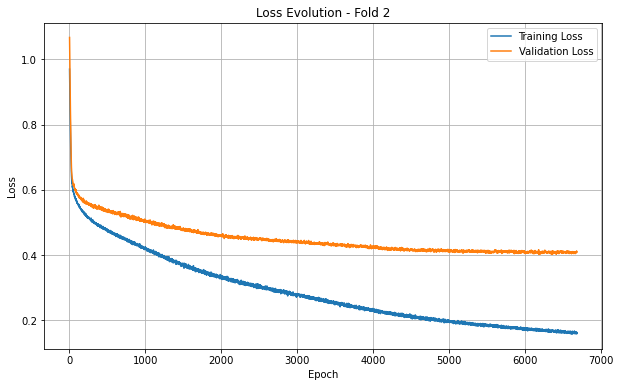

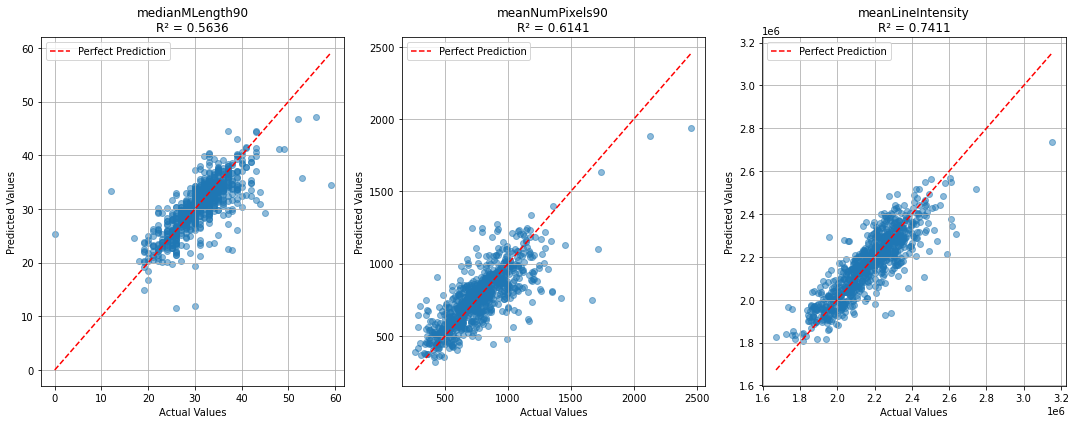


Evaluation Metrics:
MSE: 2418846433.4231
R² (medianMLength90): 0.5636
R² (meanNumPixels90): 0.6141
R² (meanLineIntensity): 0.7411
Fold 2 Validation MSE: 2418846433.4231
Fold 2 R² scores:
    medianMLength90: 0.5636
    meanNumPixels90: 0.6141
    meanLineIntensity: 0.7411

Training Fold 3
--------------------------------------------------
Total Parameters: 1,588,739
Epoch [10/10000], Train Loss: 0.855470, Val Loss: 0.831774
Epoch [20/10000], Train Loss: 0.715808, Val Loss: 0.706687
Epoch [30/10000], Train Loss: 0.628779, Val Loss: 0.640893
Epoch [40/10000], Train Loss: 0.599443, Val Loss: 0.627978
Epoch [50/10000], Train Loss: 0.586678, Val Loss: 0.611857
Epoch [60/10000], Train Loss: 0.575272, Val Loss: 0.603597
Epoch [70/10000], Train Loss: 0.572317, Val Loss: 0.597344
Epoch [80/10000], Train Loss: 0.564614, Val Loss: 0.592492
Epoch [90/10000], Train Loss: 0.556444, Val Loss: 0.583176
Epoch [100/10000], Train Loss: 0.551371, Val Loss: 0.579808
Epoch [110/10000], Train Loss: 0.546311

Epoch [1320/10000], Train Loss: 0.369677, Val Loss: 0.520769
Epoch [1330/10000], Train Loss: 0.370273, Val Loss: 0.520170
Epoch [1340/10000], Train Loss: 0.367482, Val Loss: 0.522074
Epoch [1350/10000], Train Loss: 0.370710, Val Loss: 0.522823
Epoch [1360/10000], Train Loss: 0.366747, Val Loss: 0.522385
Epoch [1370/10000], Train Loss: 0.369555, Val Loss: 0.515707
Epoch [1380/10000], Train Loss: 0.367111, Val Loss: 0.515520
Epoch [1390/10000], Train Loss: 0.363720, Val Loss: 0.517370
Epoch [1400/10000], Train Loss: 0.361438, Val Loss: 0.519357
Epoch [1410/10000], Train Loss: 0.363565, Val Loss: 0.517336
Epoch [1420/10000], Train Loss: 0.361280, Val Loss: 0.518301
Epoch [1430/10000], Train Loss: 0.363844, Val Loss: 0.516564
Epoch [1440/10000], Train Loss: 0.357341, Val Loss: 0.519243
Epoch [1450/10000], Train Loss: 0.360276, Val Loss: 0.513576
Epoch [1460/10000], Train Loss: 0.360488, Val Loss: 0.513009
Epoch [1470/10000], Train Loss: 0.357948, Val Loss: 0.512342
Epoch [1480/10000], Trai

Epoch [2670/10000], Train Loss: 0.291828, Val Loss: 0.473833
Epoch [2680/10000], Train Loss: 0.285999, Val Loss: 0.474820
Epoch [2690/10000], Train Loss: 0.286644, Val Loss: 0.472034
Epoch [2700/10000], Train Loss: 0.286126, Val Loss: 0.475347
Epoch [2710/10000], Train Loss: 0.287621, Val Loss: 0.473961
Epoch [2720/10000], Train Loss: 0.287150, Val Loss: 0.475767
Epoch [2730/10000], Train Loss: 0.287706, Val Loss: 0.471706
Epoch [2740/10000], Train Loss: 0.283785, Val Loss: 0.472207
Epoch [2750/10000], Train Loss: 0.288091, Val Loss: 0.473485
Epoch [2760/10000], Train Loss: 0.284237, Val Loss: 0.473144
Epoch [2770/10000], Train Loss: 0.288356, Val Loss: 0.469687
Epoch [2780/10000], Train Loss: 0.285486, Val Loss: 0.472626
Epoch [2790/10000], Train Loss: 0.283372, Val Loss: 0.474365
Epoch [2800/10000], Train Loss: 0.280533, Val Loss: 0.475916
Epoch [2810/10000], Train Loss: 0.282699, Val Loss: 0.471476
Epoch [2820/10000], Train Loss: 0.280651, Val Loss: 0.474153
Epoch [2830/10000], Trai

Epoch [4020/10000], Train Loss: 0.230927, Val Loss: 0.444409
Epoch [4030/10000], Train Loss: 0.229476, Val Loss: 0.445439
Epoch [4040/10000], Train Loss: 0.227901, Val Loss: 0.440825
Epoch [4050/10000], Train Loss: 0.225431, Val Loss: 0.447065
Epoch [4060/10000], Train Loss: 0.225411, Val Loss: 0.440579
Epoch [4070/10000], Train Loss: 0.225288, Val Loss: 0.442569
Epoch [4080/10000], Train Loss: 0.229684, Val Loss: 0.443182
Epoch [4090/10000], Train Loss: 0.223393, Val Loss: 0.443151
Epoch [4100/10000], Train Loss: 0.223256, Val Loss: 0.438693
Epoch [4110/10000], Train Loss: 0.226229, Val Loss: 0.441423
Epoch [4120/10000], Train Loss: 0.226266, Val Loss: 0.439839
Epoch [4130/10000], Train Loss: 0.217652, Val Loss: 0.439576
Epoch [4140/10000], Train Loss: 0.218967, Val Loss: 0.440575
Epoch [4150/10000], Train Loss: 0.223400, Val Loss: 0.438301
Epoch [4160/10000], Train Loss: 0.224985, Val Loss: 0.441598
Epoch [4170/10000], Train Loss: 0.222757, Val Loss: 0.437859
Epoch [4180/10000], Trai

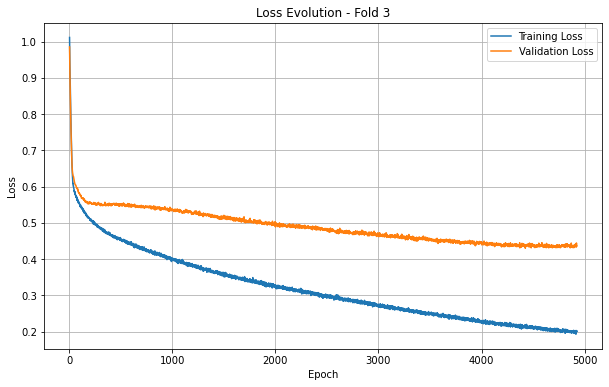

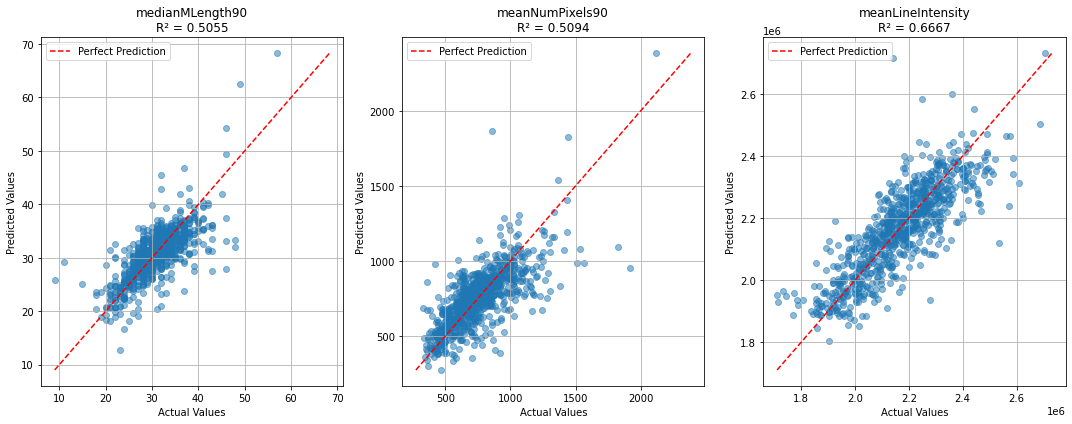


Evaluation Metrics:
MSE: 2768771045.9771
R² (medianMLength90): 0.5055
R² (meanNumPixels90): 0.5094
R² (meanLineIntensity): 0.6667
Fold 3 Validation MSE: 2768771045.9771
Fold 3 R² scores:
    medianMLength90: 0.5055
    meanNumPixels90: 0.5094
    meanLineIntensity: 0.6667

Training Fold 4
--------------------------------------------------
Total Parameters: 1,588,739
Epoch [10/10000], Train Loss: 0.864991, Val Loss: 0.785157
Epoch [20/10000], Train Loss: 0.711813, Val Loss: 0.649441
Epoch [30/10000], Train Loss: 0.621129, Val Loss: 0.578755
Epoch [40/10000], Train Loss: 0.594201, Val Loss: 0.557871
Epoch [50/10000], Train Loss: 0.586120, Val Loss: 0.550084
Epoch [60/10000], Train Loss: 0.576443, Val Loss: 0.545553
Epoch [70/10000], Train Loss: 0.564453, Val Loss: 0.539743
Epoch [80/10000], Train Loss: 0.561586, Val Loss: 0.532057
Epoch [90/10000], Train Loss: 0.550983, Val Loss: 0.528670
Epoch [100/10000], Train Loss: 0.548094, Val Loss: 0.522906
Epoch [110/10000], Train Loss: 0.548514

Epoch [1320/10000], Train Loss: 0.377486, Val Loss: 0.432818
Epoch [1330/10000], Train Loss: 0.378562, Val Loss: 0.432356
Epoch [1340/10000], Train Loss: 0.379762, Val Loss: 0.431780
Epoch [1350/10000], Train Loss: 0.373617, Val Loss: 0.433151
Epoch [1360/10000], Train Loss: 0.376742, Val Loss: 0.431308
Epoch [1370/10000], Train Loss: 0.371923, Val Loss: 0.430639
Epoch [1380/10000], Train Loss: 0.374454, Val Loss: 0.432248
Epoch [1390/10000], Train Loss: 0.372451, Val Loss: 0.431068
Epoch [1400/10000], Train Loss: 0.370354, Val Loss: 0.433582
Epoch [1410/10000], Train Loss: 0.372212, Val Loss: 0.427842
Epoch [1420/10000], Train Loss: 0.370787, Val Loss: 0.429774
Epoch [1430/10000], Train Loss: 0.367300, Val Loss: 0.429918
Epoch [1440/10000], Train Loss: 0.366833, Val Loss: 0.429053
Epoch [1450/10000], Train Loss: 0.369800, Val Loss: 0.432327
Epoch [1460/10000], Train Loss: 0.367924, Val Loss: 0.428993
Epoch [1470/10000], Train Loss: 0.367611, Val Loss: 0.430013
Epoch [1480/10000], Trai

Epoch [2670/10000], Train Loss: 0.299753, Val Loss: 0.401876
Epoch [2680/10000], Train Loss: 0.294697, Val Loss: 0.400691
Epoch [2690/10000], Train Loss: 0.295453, Val Loss: 0.402365
Epoch [2700/10000], Train Loss: 0.294832, Val Loss: 0.401651
Epoch [2710/10000], Train Loss: 0.295813, Val Loss: 0.400267
Epoch [2720/10000], Train Loss: 0.292240, Val Loss: 0.402338
Epoch [2730/10000], Train Loss: 0.293359, Val Loss: 0.401486
Epoch [2740/10000], Train Loss: 0.287957, Val Loss: 0.400824
Epoch [2750/10000], Train Loss: 0.292648, Val Loss: 0.397623
Epoch [2760/10000], Train Loss: 0.293791, Val Loss: 0.400375
Epoch [2770/10000], Train Loss: 0.288590, Val Loss: 0.401112
Epoch [2780/10000], Train Loss: 0.289018, Val Loss: 0.399515
Epoch [2790/10000], Train Loss: 0.293771, Val Loss: 0.402831
Epoch [2800/10000], Train Loss: 0.292047, Val Loss: 0.403120
Epoch [2810/10000], Train Loss: 0.288787, Val Loss: 0.400730
Epoch [2820/10000], Train Loss: 0.291798, Val Loss: 0.400178
Epoch [2830/10000], Trai

Epoch [4020/10000], Train Loss: 0.237588, Val Loss: 0.380989
Epoch [4030/10000], Train Loss: 0.238870, Val Loss: 0.386494
Epoch [4040/10000], Train Loss: 0.240093, Val Loss: 0.384418
Epoch [4050/10000], Train Loss: 0.240087, Val Loss: 0.381718
Epoch [4060/10000], Train Loss: 0.235839, Val Loss: 0.383033
Epoch [4070/10000], Train Loss: 0.235168, Val Loss: 0.383848
Epoch [4080/10000], Train Loss: 0.236809, Val Loss: 0.381932
Epoch [4090/10000], Train Loss: 0.238942, Val Loss: 0.382015
Epoch [4100/10000], Train Loss: 0.236351, Val Loss: 0.380267
Epoch [4110/10000], Train Loss: 0.236778, Val Loss: 0.384490
Epoch [4120/10000], Train Loss: 0.234415, Val Loss: 0.383658
Epoch [4130/10000], Train Loss: 0.231879, Val Loss: 0.382173
Epoch [4140/10000], Train Loss: 0.230467, Val Loss: 0.382441
Epoch [4150/10000], Train Loss: 0.232372, Val Loss: 0.383235
Epoch [4160/10000], Train Loss: 0.240318, Val Loss: 0.382586
Epoch [4170/10000], Train Loss: 0.232881, Val Loss: 0.382622
Epoch [4180/10000], Trai

Epoch [5370/10000], Train Loss: 0.192971, Val Loss: 0.367640
Epoch [5380/10000], Train Loss: 0.194879, Val Loss: 0.370303
Epoch [5390/10000], Train Loss: 0.194669, Val Loss: 0.371488
Epoch [5400/10000], Train Loss: 0.194455, Val Loss: 0.377878
Epoch [5410/10000], Train Loss: 0.192705, Val Loss: 0.371330
Epoch [5420/10000], Train Loss: 0.191162, Val Loss: 0.371342
Epoch [5430/10000], Train Loss: 0.190964, Val Loss: 0.369121
Epoch [5440/10000], Train Loss: 0.191466, Val Loss: 0.370524
Epoch [5450/10000], Train Loss: 0.192729, Val Loss: 0.372566
Epoch [5460/10000], Train Loss: 0.191939, Val Loss: 0.372502
Epoch [5470/10000], Train Loss: 0.192654, Val Loss: 0.374197
Epoch [5480/10000], Train Loss: 0.192386, Val Loss: 0.372709
Epoch [5490/10000], Train Loss: 0.192774, Val Loss: 0.371257
Epoch [5500/10000], Train Loss: 0.188169, Val Loss: 0.371754
Epoch [5510/10000], Train Loss: 0.190806, Val Loss: 0.371709
Epoch [5520/10000], Train Loss: 0.192041, Val Loss: 0.373702
Epoch [5530/10000], Trai

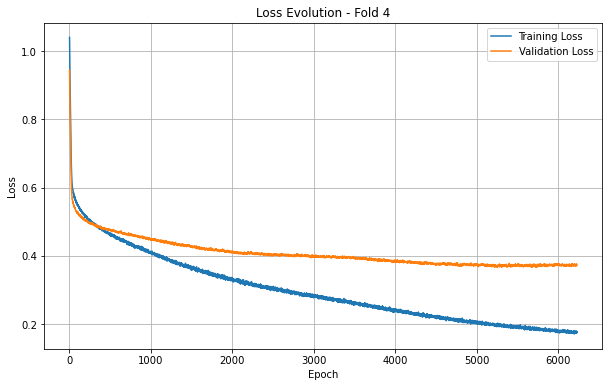

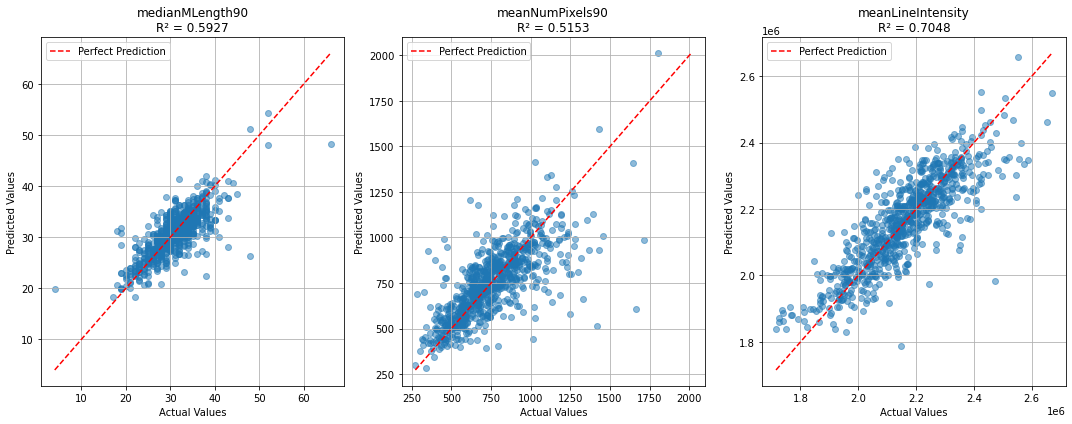


Evaluation Metrics:
MSE: 2348258349.2147
R² (medianMLength90): 0.5927
R² (meanNumPixels90): 0.5153
R² (meanLineIntensity): 0.7048
Fold 4 Validation MSE: 2348258349.2147
Fold 4 R² scores:
    medianMLength90: 0.5927
    meanNumPixels90: 0.5153
    meanLineIntensity: 0.7048

Training Fold 5
--------------------------------------------------
Total Parameters: 1,588,739
Epoch [10/10000], Train Loss: 0.834838, Val Loss: 0.799695
Epoch [20/10000], Train Loss: 0.705809, Val Loss: 0.671869
Epoch [30/10000], Train Loss: 0.628241, Val Loss: 0.599953
Epoch [40/10000], Train Loss: 0.604856, Val Loss: 0.579547
Epoch [50/10000], Train Loss: 0.585302, Val Loss: 0.569349
Epoch [60/10000], Train Loss: 0.575222, Val Loss: 0.565716
Epoch [70/10000], Train Loss: 0.564417, Val Loss: 0.560958
Epoch [80/10000], Train Loss: 0.562709, Val Loss: 0.557403
Epoch [90/10000], Train Loss: 0.556540, Val Loss: 0.553815
Epoch [100/10000], Train Loss: 0.549690, Val Loss: 0.552835
Epoch [110/10000], Train Loss: 0.542759

Epoch [1320/10000], Train Loss: 0.365154, Val Loss: 0.469592
Epoch [1330/10000], Train Loss: 0.366608, Val Loss: 0.471555
Epoch [1340/10000], Train Loss: 0.366035, Val Loss: 0.471808
Epoch [1350/10000], Train Loss: 0.371183, Val Loss: 0.470093
Epoch [1360/10000], Train Loss: 0.363430, Val Loss: 0.470432
Epoch [1370/10000], Train Loss: 0.362314, Val Loss: 0.469108
Epoch [1380/10000], Train Loss: 0.359936, Val Loss: 0.468320
Epoch [1390/10000], Train Loss: 0.355588, Val Loss: 0.468885
Epoch [1400/10000], Train Loss: 0.359105, Val Loss: 0.469448
Epoch [1410/10000], Train Loss: 0.357660, Val Loss: 0.468262
Epoch [1420/10000], Train Loss: 0.358448, Val Loss: 0.465821
Epoch [1430/10000], Train Loss: 0.362006, Val Loss: 0.468098
Epoch [1440/10000], Train Loss: 0.358778, Val Loss: 0.467614
Epoch [1450/10000], Train Loss: 0.361787, Val Loss: 0.467283
Epoch [1460/10000], Train Loss: 0.351457, Val Loss: 0.468013
Epoch [1470/10000], Train Loss: 0.348190, Val Loss: 0.466039
Epoch [1480/10000], Trai

Epoch [2670/10000], Train Loss: 0.279641, Val Loss: 0.446644
Epoch [2680/10000], Train Loss: 0.282851, Val Loss: 0.449259
Epoch [2690/10000], Train Loss: 0.286035, Val Loss: 0.448300
Epoch [2700/10000], Train Loss: 0.280117, Val Loss: 0.446237
Epoch [2710/10000], Train Loss: 0.278131, Val Loss: 0.445596
Epoch [2720/10000], Train Loss: 0.278515, Val Loss: 0.446592
Epoch [2730/10000], Train Loss: 0.280881, Val Loss: 0.446991
Epoch [2740/10000], Train Loss: 0.281751, Val Loss: 0.447853
Epoch [2750/10000], Train Loss: 0.281392, Val Loss: 0.446702
Epoch [2760/10000], Train Loss: 0.279499, Val Loss: 0.447994
Epoch [2770/10000], Train Loss: 0.279423, Val Loss: 0.447589
Epoch [2780/10000], Train Loss: 0.277264, Val Loss: 0.451968
Epoch [2790/10000], Train Loss: 0.281216, Val Loss: 0.446950
Epoch [2800/10000], Train Loss: 0.277723, Val Loss: 0.445591
Epoch [2810/10000], Train Loss: 0.276728, Val Loss: 0.445680
Epoch [2820/10000], Train Loss: 0.274871, Val Loss: 0.446881
Epoch [2830/10000], Trai

Epoch [4020/10000], Train Loss: 0.230016, Val Loss: 0.430563
Epoch [4030/10000], Train Loss: 0.232892, Val Loss: 0.433712
Epoch [4040/10000], Train Loss: 0.232264, Val Loss: 0.434173
Epoch [4050/10000], Train Loss: 0.227348, Val Loss: 0.428572
Epoch [4060/10000], Train Loss: 0.224950, Val Loss: 0.435185
Epoch [4070/10000], Train Loss: 0.227712, Val Loss: 0.431061
Epoch [4080/10000], Train Loss: 0.228952, Val Loss: 0.431866
Epoch [4090/10000], Train Loss: 0.225424, Val Loss: 0.432079
Epoch [4100/10000], Train Loss: 0.227926, Val Loss: 0.429649
Epoch [4110/10000], Train Loss: 0.225117, Val Loss: 0.428277
Epoch [4120/10000], Train Loss: 0.226811, Val Loss: 0.434555
Epoch [4130/10000], Train Loss: 0.225593, Val Loss: 0.428756
Epoch [4140/10000], Train Loss: 0.223962, Val Loss: 0.433796
Epoch [4150/10000], Train Loss: 0.223213, Val Loss: 0.429956
Epoch [4160/10000], Train Loss: 0.223875, Val Loss: 0.429862
Epoch [4170/10000], Train Loss: 0.225326, Val Loss: 0.427889
Epoch [4180/10000], Trai

Epoch [5370/10000], Train Loss: 0.180589, Val Loss: 0.411351
Epoch [5380/10000], Train Loss: 0.183153, Val Loss: 0.412517
Epoch [5390/10000], Train Loss: 0.182388, Val Loss: 0.409463
Epoch [5400/10000], Train Loss: 0.182751, Val Loss: 0.406692
Epoch [5410/10000], Train Loss: 0.181848, Val Loss: 0.411701
Epoch [5420/10000], Train Loss: 0.182565, Val Loss: 0.408354
Epoch [5430/10000], Train Loss: 0.179907, Val Loss: 0.404525
Epoch [5440/10000], Train Loss: 0.182685, Val Loss: 0.406741
Epoch [5450/10000], Train Loss: 0.183107, Val Loss: 0.406565
Epoch [5460/10000], Train Loss: 0.181691, Val Loss: 0.405376
Epoch [5470/10000], Train Loss: 0.179298, Val Loss: 0.408793
Epoch [5480/10000], Train Loss: 0.184144, Val Loss: 0.410651
Epoch [5490/10000], Train Loss: 0.179859, Val Loss: 0.409471
Epoch [5500/10000], Train Loss: 0.182499, Val Loss: 0.407003
Epoch [5510/10000], Train Loss: 0.177770, Val Loss: 0.405525
Epoch [5520/10000], Train Loss: 0.182311, Val Loss: 0.405370
Epoch [5530/10000], Trai

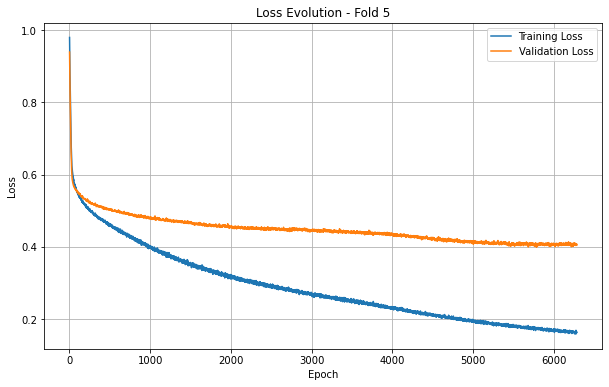

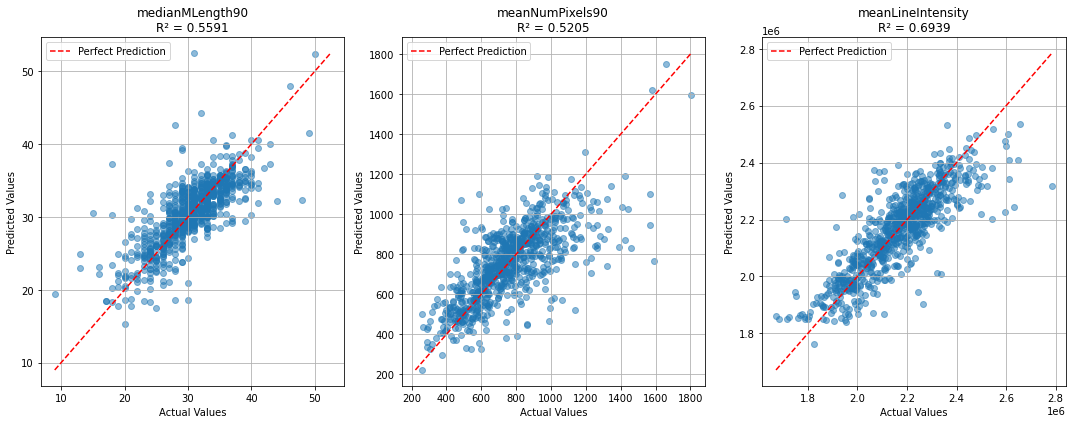


Evaluation Metrics:
MSE: 2723844054.6887
R² (medianMLength90): 0.5591
R² (meanNumPixels90): 0.5205
R² (meanLineIntensity): 0.6939
Fold 5 Validation MSE: 2723844054.6887
Fold 5 R² scores:
    medianMLength90: 0.5591
    meanNumPixels90: 0.5205
    meanLineIntensity: 0.6939

Cross-validation Results:
Average MSE: 2596677896.2297 ± 176210372.4696
Average R² (medianMLength90): 0.5598 ± 0.0296
Average R² (meanNumPixels90): 0.5272 ± 0.0460
Average R² (meanLineIntensity): 0.6971 ± 0.0255
------------------------------

Cross-validation Results:
Average MSE: 2596677896.2297 ± 176210372.4696


In [3]:
import torch.nn as nn
import torch.optim as optim
import tqdm
from tqdm import tqdm
import copy
import matplotlib.pyplot as plt

class ResidualBlock(nn.Module):
    def __init__(self, dim, dropout_rate=0.2):
        super(ResidualBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Linear(dim, dim),
            #nn.BatchNorm1d(dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(dim, dim),
            #nn.BatchNorm1d(dim)
        )
        self.relu = nn.ReLU()
        
    def forward(self, x):
        residual = x
        out = self.block(x)
        out += residual  # Skip connection
        return self.relu(out)

class MLPRegressor(nn.Module):
    def __init__(self, input_dim=5, hidden_dim=128, num_layers=3, output_dim=2, dropout_rate=0.2):
        super(MLPRegressor, self).__init__()
        
        self.input_layer = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            #nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            #nn.Dropout(dropout_rate)
        )
        
        self.residual_layers = nn.ModuleList([
            ResidualBlock(hidden_dim, dropout_rate) 
            for _ in range(num_layers - 1)
        ])
        
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = self.input_layer(x)
        for layer in self.residual_layers:
            x = layer(x)
        return self.output_layer(x)

def print_model_params(model):
    total_params = 0
    input_params = sum(p.numel() for p in model.input_layer.parameters())
    total_params += input_params
    
    for i, block in enumerate(model.residual_layers):
        block_params = sum(p.numel() for p in block.parameters())
        total_params += block_params
    
    output_params = sum(p.numel() for p in model.output_layer.parameters())
    total_params += output_params
    
    print("-" * 50)
    print(f"Total Parameters: {total_params:,}")

def train_model(model, train_loader, val_loader, num_epochs=1000, patience=50):
    model = model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.00001)

    best_val_loss = float('inf')
    best_model = None
    patience_counter = 0
    
    # Lists to store losses for plotting
    train_losses = []
    val_losses = []
    epochs = []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * X_batch.size(0)

        train_loss /= len(train_loader.dataset)

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item() * X_batch.size(0)

        val_loss /= len(val_loader.dataset)

        # Store losses for plotting
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        epochs.append(epoch + 1)

        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = copy.deepcopy(model)
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping triggered at epoch {epoch+1}')
            break

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')

    return best_model, train_losses, val_losses, epochs



def train_k_fold(X, y, fold_indices, target_cols, hidden_dim=128, num_layers=3, batch_size=32):
    models = []
    scalers = []
    scalers_y = []
    val_scores = []
    r2_scores_all = []

    for fold, (train_idx, val_idx) in enumerate(fold_indices):
        print(f'\nTraining Fold {fold+1}')

        # Prepare data for this fold
        train_loader, val_loader, scaler, scaler_y = prepare_fold_data(
            X, y, train_idx, val_idx, batch_size
        )

        # Initialize model
        model = MLPRegressor(
            input_dim=X.shape[1],
            hidden_dim=hidden_dim,
            num_layers=num_layers,
            output_dim=y.shape[1]
        )
        
        print_model_params(model)

        # Train model and get loss history
        best_model, train_losses, val_losses, epochs = train_model(
            model,
            train_loader,
            val_loader,
            num_epochs=10000,
            patience=500
        )

        # Plot loss evolution for this fold
        plt.figure(figsize=(10, 6))
        plt.plot(epochs[1:], train_losses[1:], label='Training Loss')
        plt.plot(epochs[1:], val_losses[1:], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'Loss Evolution - Fold {fold+1}')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Store the trained model and scalers
        models.append(best_model)
        scalers.append(scaler)
        scalers_y.append(scaler_y)

        # Calculate validation scores
        mse, r2_scores, predictions, actuals = evaluate_model(
            best_model, val_loader, scaler_y, target_cols
        )
        val_scores.append(mse)
        r2_scores_all.append(r2_scores)
        print(f'Fold {fold+1} Validation MSE: {mse:.4f}')
        print(f'Fold {fold+1} R² scores:')
        for target, r2 in zip(target_cols, r2_scores):
            print(f"    {target}: {r2:.4f}")

    # Calculate and print average metrics
    print("\nCross-validation Results:")
    print(f"Average MSE: {np.mean(val_scores):.4f} ± {np.std(val_scores):.4f}")
    r2_scores_all = np.array(r2_scores_all)
    for i, target in enumerate(target_cols):
        mean_r2 = np.mean(r2_scores_all[:, i])
        std_r2 = np.std(r2_scores_all[:, i])
        print(f"Average R² ({target}): {mean_r2:.4f} ± {std_r2:.4f}")
    
    return models, scalers, scalers_y, val_scores, r2_scores_all

def evaluate_model(model, data_loader, scaler_y, target_cols):
    model = model.to(device)
    model.eval()
    criterion = nn.MSELoss()
    total_loss = 0.0

    # Lists to store predictions and actual values
    all_predictions = []
    all_actuals = []

    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)

            # Move to CPU and convert to numpy
            outputs_np = outputs.cpu().numpy()
            y_batch_np = y_batch.cpu().numpy()

            # Inverse transform
            outputs_inv = scaler_y.inverse_transform(outputs_np)
            y_batch_inv = scaler_y.inverse_transform(y_batch_np)

            # Compute loss in original scale
            loss = criterion(torch.tensor(outputs_inv), torch.tensor(y_batch_inv))
            total_loss += loss.item() * X_batch.size(0)

            all_predictions.append(outputs_inv)
            all_actuals.append(y_batch_inv)

    # Convert lists to numpy arrays
    predictions = np.vstack(all_predictions)
    actuals = np.vstack(all_actuals)

    # Calculate MSE
    mse = total_loss / len(data_loader.dataset)

    # Calculate R² for each target
    r2_scores = []
    for i in range(actuals.shape[1]):
        ss_res = np.sum((actuals[:, i] - predictions[:, i]) ** 2)
        ss_tot = np.sum((actuals[:, i] - np.mean(actuals[:, i])) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        r2_scores.append(r2)

    # Create plots
    import matplotlib.pyplot as plt

    num_targets = len(target_cols)
    fig, axes = plt.subplots(1, num_targets, figsize=(5 * num_targets, 6))
    if num_targets == 1:
        axes = [axes]  # Make axes iterable if only one target

    for i, (ax, target) in enumerate(zip(axes, target_cols)):
        # Plot predicted vs actual
        ax.scatter(actuals[:, i], predictions[:, i], alpha=0.5)

        # Plot perfect prediction line
        min_val = min(actuals[:, i].min(), predictions[:, i].min())
        max_val = max(actuals[:, i].max(), predictions[:, i].max())
        ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

        # Add labels and title
        ax.set_xlabel('Actual Values')
        ax.set_ylabel('Predicted Values')
        ax.set_title(f'{target}\nR² = {r2_scores[i]:.4f}')
        ax.grid(True)
        ax.legend()

    plt.tight_layout()
    plt.show()

    # Print detailed metrics
    print("\nEvaluation Metrics:")
    print(f"MSE: {mse:.4f}")
    for target, r2 in zip(target_cols, r2_scores):
        print(f"R² ({target}): {r2:.4f}")

    return mse, r2_scores, predictions, actuals



# Train the models
models, scalers, scalers_y, val_scores, r2_scores_all = train_k_fold(
    X, y, fold_indices, target_cols=target_cols,
    hidden_dim=512, num_layers=4, batch_size=512
)

print('---'*10)
# Print overall results
print("\nCross-validation Results:")
print(f"Average MSE: {np.mean(val_scores):.4f} ± {np.std(val_scores):.4f}")


In [4]:
import os
import json
import pickle
import torch
from datetime import datetime

def save_training_results(models, scalers, scalers_y, val_scores, r2_scores_all, input_cols, target_cols):
    # Create Results directory if it doesn't exist
    results_dir = "Results"
    if not os.path.exists(results_dir):
        os.makedirs(results_dir)
    
    # Create timestamped subdirectory for this training run
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    run_dir = os.path.join(results_dir, f"run_{timestamp}")
    os.makedirs(run_dir)
    
    # Save models
    models_dir = os.path.join(run_dir, "models")
    os.makedirs(models_dir)
    for i, model in enumerate(models):
        model_path = os.path.join(models_dir, f"model_fold_{i+1}.pt")
        torch.save(model.state_dict(), model_path)
    
    # Save scalers
    scalers_dir = os.path.join(run_dir, "scalers")
    os.makedirs(scalers_dir)
    for i, (scaler, scaler_y) in enumerate(zip(scalers, scalers_y)):
        # Save feature scaler
        scaler_path = os.path.join(scalers_dir, f"feature_scaler_fold_{i+1}.pkl")
        with open(scaler_path, 'wb') as f:
            pickle.dump(scaler, f)
        
        # Save target scaler
        scaler_y_path = os.path.join(scalers_dir, f"target_scaler_fold_{i+1}.pkl")
        with open(scaler_y_path, 'wb') as f:
            pickle.dump(scaler_y, f)
    
    # Save metrics and configuration
    metrics = {
        'input_features': input_cols,
        'target_variables': target_cols,
        'val_scores': val_scores.tolist() if isinstance(val_scores, np.ndarray) else val_scores,
        'r2_scores_all': r2_scores_all.tolist() if isinstance(r2_scores_all, np.ndarray) else r2_scores_all,
        'average_mse': float(np.mean(val_scores)),
        'mse_std': float(np.std(val_scores)),
        'average_r2_by_target': {
            target: {
                'mean': float(np.mean(r2_scores_all[:, i])),
                'std': float(np.std(r2_scores_all[:, i]))
            }
            for i, target in enumerate(target_cols)
        }
    }
    
    metrics_path = os.path.join(run_dir, "metrics.json")
    with open(metrics_path, 'w') as f:
        json.dump(metrics, f, indent=4)
    
    print(f"\nResults saved in: {run_dir}")
    print("Saved contents:")
    print(f"- {len(models)} models")
    print(f"- {len(scalers)} feature scalers and target scalers")
    print("- Evaluation metrics and configuration")

# Call the function to save the results
save_training_results(
    models=models,
    scalers=scalers,
    scalers_y=scalers_y,  
    val_scores=val_scores,
    r2_scores_all=r2_scores_all,
    input_cols=input_cols,
    target_cols=target_cols
)


Results saved in: Results/run_20241121_175240
Saved contents:
- 5 models
- 5 feature scalers and target scalers
- Evaluation metrics and configuration


In [5]:
import matplotlib.pyplot as plt

def plot_prediction_errors_ensemble(data, models, scalers, scalers_y, input_cols, target_cols, dataset_name='Data'):
    # Extract features and targets
    X_data = data[input_cols].values
    y_data = data[target_cols].values

    # Initialize arrays to collect predictions
    y_preds = []

    for model, scaler, scaler_y in zip(models, scalers, scalers_y):
        # Scale X
        X_scaled = scaler.transform(X_data)

        # Convert to tensor
        X_tensor = torch.FloatTensor(X_scaled).to(device)

        # Predict
        model = model.to(device)
        model.eval()
        with torch.no_grad():
            y_pred_scaled = model(X_tensor).cpu().numpy()

        # Inverse transform predictions
        y_pred = scaler_y.inverse_transform(y_pred_scaled)
        y_preds.append(y_pred)

    # Average predictions across all models
    y_pred_avg = np.mean(y_preds, axis=0)

    # Compute per-sample MSE across all targets
    mse_per_sample = np.mean((y_pred_avg - y_data) ** 2, axis=1)

    # Create dataframe for plotting
    plot_df = data.copy()
    plot_df['MSE'] = mse_per_sample

    # Plotting
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        x=plot_df['NoLines'], 
        y=plot_df['Z'], 
        c=plot_df['MSE'], 
        cmap='viridis',
        alpha=0.7
    )
    cbar = plt.colorbar(scatter)
    cbar.set_label('Per-sample MSE')
    plt.xlabel('NoLines')
    plt.ylabel('Z')
    plt.title(f'Per-sample MSE Distribution in Z-NoLines plane ({dataset_name})')
    plt.grid(True)
    plt.show()


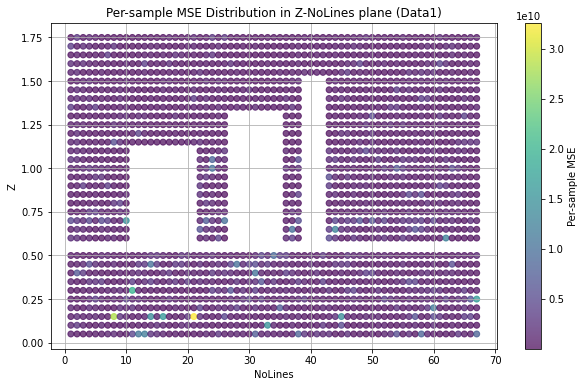

In [6]:
# Plot for data1
plot_prediction_errors_ensemble(
    data1, 
    models, 
    scalers, 
    scalers_y, 
    input_cols, 
    target_cols, 
    dataset_name='Data1'
)

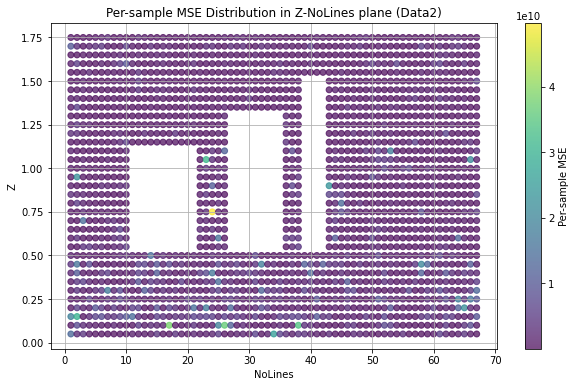

In [7]:
# Plot for data2
plot_prediction_errors_ensemble(
    data2, 
    models, 
    scalers, 
    scalers_y, 
    input_cols, 
    target_cols, 
    dataset_name='Data2'
)
